# Mini Project Notebook: Stock Prices Anomaly Detection

## Learning Objectives

At the end of the experiment, you will be able to :

* apply PCA based analysis on various stocks data
* analyze and create time series data
* implement LSTM auto-encoders
* detect the anomalies based on the loss


## Information

Autoencoder Neural Networks try to learn data representation of its input. Usually, we want to learn an efficient encoding that uses fewer parameters/memory. The encoding should allow for output similar to the original input. In a sense, we’re forcing the model to learn the most important features of the data using as few parameters as possible.

LSTM autoencoder is an encoder that makes use of LSTM encoder-decoder architecture to compress data using an encoder and decode it to retain original structure using a decoder.

**Anomaly Detection**

Anomaly detection refers to the task of finding/identifying rare events/data points. Some applications include - bank fraud detection, tumor detection in medical imaging, and errors in written text.

A lot of supervised and unsupervised approaches for anomaly detection have been proposed. Some of the approaches include - One-class SVMs, Bayesian Networks, Cluster analysis, and Neural Networks.

We will use an LSTM Autoencoder Neural Network to detect/predict anomalies (sudden price changes) in the S&P 500 index.

## Dataset



This mini-project consists of two parts and two different stock price datasets:

### PART A

Using the **S&P 500 stock prices data of different companies**, we will perform a PCA based analysis. 

### PART B

Using the **S&P 500 stock price index time series data**, we will perform anomaly detection in the stock prices across the years. The dataset chosen is is S&P500 Daily Index a .csv format with one column with a daily timestamp and the second column with the raw, un-adjusted closing prices for each day. This long term, granular time series dataset allows researchers to have a good sized publicly available financial dataset to explore time series trends or use as part of a quantitative finance project.

## Problem Statement

Detect the stock price anomalies by implementing an LSTM autoencoder

In [ ]:
#@title Download dataset
!wget -qq https://cdn.iisc.talentsprint.com/CDS/MiniProjects/SPY.csv
!wget -qq https://cdn.iisc.talentsprint.com/CDS/MiniProjects/prices.csv

### Import required packages

In [ ]:
import keras
from keras.layers import Activation, Dense, Dropout, Flatten
from keras.layers import LSTM, RepeatVector, TimeDistributed
from keras.layers.normalization import BatchNormalization
from keras.models import Sequential, Model
import tensorflow as tf
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

## PCA Analysis (PART-A)

Perform PCA based analytics on the stock prices data from different companies.

Hint: Refer to the article [here](https://towardsdatascience.com/stock-market-analytics-with-pca-d1c2318e3f0e).


### Load and pre-process the prices data

In [ ]:
prices_path = "prices.csv"
# YOUR CODE HERE
df = pd.read_csv(prices_path)
df

,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,ADI,ADM,ADP,ADSK,AEE,AEP,AES,AFL,AIG,AIZ,AJG,AKAM,ALB,ALGN,ALK,ALL,ALLE,AMAT,AMCR,AMD,AME,AMGN,AMP,AMT,AMZN,ANET,ANSS,ANTM,AON,AOS,...,V,VFC,VIAC,VLO,VMC,VNO,VRSK,VRSN,VRTX,VTR,VTRS,VZ,WAB,WAT,WBA,WDC,WEC,WELL,WFC,WHR,WLTW,WM,WMB,WMT,WRB,WRK,WST,WU,WY,WYNN,XEL,XLNX,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,85.017082,28.982893,157.171890,74.207466,81.950539,82.938141,168.809998,84.622925,204.910950,334.429993,116.998917,44.048424,164.650070,187.830002,73.122215,88.918884,19.133558,51.241142,49.003220,128.423721,93.231590,87.639999,71.061058,283.679993,67.785583,108.968430,123.176743,61.148903,9.971735,49.099998,99.718460,230.298279,163.271606,222.032486,1898.010010,204.720001,259.589996,295.028076,205.982056,46.387165,...,189.381256,96.426582,40.090492,86.901367,140.557083,60.242638,149.663574,196.729996,219.449997,52.252220,20.504297,56.621544,80.132065,235.059998,55.568127,64.771545,86.955795,75.164200,51.397491,141.787598,200.223602,111.092049,20.954809,116.044952,67.740730,41.771225,151.029617,24.689568,28.591002,142.405029,59.934875,100.115349,63.633118,56.203197,78.396255,99.349007,147.579269,259.140015,49.903751,132.803421
2,83.652077,27.548195,157.181747,73.486023,81.172668,81.895088,166.820007,83.591301,204.569687,331.809998,114.939316,43.962448,164.302048,184.949997,73.151054,88.823746,18.913849,50.885765,48.624527,129.034988,93.036346,87.239998,70.043243,280.440002,66.542633,108.978081,121.654099,60.175625,9.840403,48.599998,99.856964,228.734818,161.235901,222.139359,1874.969971,200.850006,256.970001,291.115570,205.173096,45.979324,...,187.875092,95.820480,39.480896,83.603630,139.946487,60.711697,151.119431,200.880005,217.979996,52.882324,20.057474,56.018700,79.518326,231.009995,55.568127,63.774597,87.502457,76.486641,51.081936,139.371140,200.272614,112.171654,21.044018,115.020508,67.829132,41.030972,151.427734,24.604725,28.639641,140.292755,60.223114,97.810677,63.121540,55.581242,78.857689,99.037834,147.193512,256.049988,49.199547,132.823227
3,83.899353,27.219410,154.598541,74.071579,81.813271,83.094116,179.039993,84.029251,203.233841,333.709991,113.588921,43.618546,164.524399,187.119995,73.218369,89.118690,19.133558,50.741692,48.662395,129.151443,93.465851,87.550003,69.964951,285.880005,66.224434,109.296829,121.428162,58.877934,9.774739,48.389999,99.965782,230.490112,161.766525,222.081070,1902.880005,202.860001,254.589996,294.616272,205.765030,46.270645,...,187.468826,95.445290,40.061920,83.612755,139.700287,61.502666,151.466049,202.740005,224.029999,53.429035,20.722746,55.898129,79.191666,228.880005,56.047810,62.550629,87.569580,77.649673,50.775940,140.679672,200.517624,112.755219,21.320560,114.786362,67.730896,40.406082,151.507355,24.369047,28.581272,140.015091,60.136642,95.771927,63.606186,55.887280,78.347168,98.979500,146.342834,258.010010,48.600010,131.803482
4,84.156532,27.119778,152.764648,73.723213,81.346550,82.499466,180.350006,83.562103,198.846008,333.390015,116.173134,43.093136,162.532974,187.500000,73.487579,89.137718,19.200424,50.261456,48.387844,128.278198,92.460426,90.199997,70.884911,283.059998,65.806808,108.359932,119.974274,60.578697,9.690312,48.250000,100.539551,228.322357,159.817673,217.348892,1906.859985,204.850006,256.670013,293.723907,204.018814,45.959904,...,186.973373,94.973892,40.128597,84.708961,138.124527,60.757683,152.733719,203.210007,223.789993,52.984257,21.020628,55.276722,79.161980,231.979996,55.765640,66.785164,87.233925,77.143188,50.355194,140.727402,200.105988,112.833038,21.320560,113.722878,66.493172,39.954247,151.119171,24.482172,28.396437,140.679504,60.011738,97.958405,63.085632,56.183449,78.052628,99.154533,146.214264,

In [ ]:
columns_names=df.columns.tolist()
print("Columns names:")
print(columns_names)

Columns names:
['A', 'AAL', 'AAP', 'AAPL', 'ABBV', 'ABC', 'ABMD', 'ABT', 'ACN', 'ADBE', 'ADI', 'ADM', 'ADP', 'ADSK', 'AEE', 'AEP', 'AES', 'AFL', 'AIG', 'AIZ', 'AJG', 'AKAM', 'ALB', 'ALGN', 'ALK', 'ALL', 'ALLE', 'AMAT', 'AMCR', 'AMD', 'AME', 'AMGN', 'AMP', 'AMT', 'AMZN', 'ANET', 'ANSS', 'ANTM', 'AON', 'AOS', 'APA', 'APD', 'APH', 'APTV', 'ARE', 'ATO', 'ATVI', 'AVB', 'AVGO', 'AVY', 'AWK', 'AXP', 'AZO', 'BA', 'BAC', 'BAX', 'BBY', 'BDX', 'BEN', 'BIIB', 'BIO', 'BK', 'BKNG', 'BKR', 'BLK', 'BLL', 'BMY', 'BR', 'BSX', 'BWA', 'BXP', 'C', 'CAG', 'CAH', 'CARR', 'CAT', 'CB', 'CBOE', 'CBRE', 'CCI', 'CCL', 'CDNS', 'CDW', 'CE', 'CERN', 'CF', 'CFG', 'CHD', 'CHRW', 'CHTR', 'CI', 'CINF', 'CL', 'CLX', 'CMA', 'CMCSA', 'CME', 'CMG', 'CMI', 'CMS', 'CNC', 'CNP', 'COF', 'COG', 'COO', 'COP', 'COST', 'CPB', 'CPRT', 'CRL', 'CRM', 'CSCO', 'CSX', 'CTAS', 'CTLT', 'CTSH', 'CTVA', 'CTXS', 'CVS', 'CVX', 'CZR', 'D', 'DAL', 'DD', 'DE', 'DFS', 'DG', 'DGX', 'DHI', 'DHR', 'DIS', 'DISCA', 'DISCK', 'DISH', 'DLR', 'DLTR', 'DOV'

In [ ]:
df.describe()

,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,ADI,ADM,ADP,ADSK,AEE,AEP,AES,AFL,AIG,AIZ,AJG,AKAM,ALB,ALGN,ALK,ALL,ALLE,AMAT,AMCR,AMD,AME,AMGN,AMP,AMT,AMZN,ANET,ANSS,ANTM,AON,AOS,...,V,VFC,VIAC,VLO,VMC,VNO,VRSK,VRSN,VRTX,VTR,VTRS,VZ,WAB,WAT,WBA,WDC,WEC,WELL,WFC,WHR,WLTW,WM,WMB,WMT,WRB,WRK,WST,WU,WY,WYNN,XEL,XLNX,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
count,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000,...,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000
mean,106.171822,17.292796,155.247315,107.517655,94.129335,100.486826,262.254962,102.504811,233.243117,447.628983,130.167105,47.866146,161.737019,244.666819,76.788571,83.318544,20.094196,43.174729,37.511294,126.373980,110.656406,104.540102,114.025619,402.830078,49.692573,105.404769,113.364240,83.472858,10.471045,72.235674,106.977929,230.839821,179.871473,238.402366,2898.483301,259.576183,313.826056,303.788090,209.572940,53.615468,...,203.199611,73.053758,34.441273,60.774587,141.441660,41.100035,174.974825,206.022112,237.665878,45.045478,16.194708,55.330165,69.579869,242.418473,44.419480,53.364761,91.187972,62.854044,33.326680,171.460009,209.288257,115.879467,20.285710,131.612723,65.585661,39.745217,256.653025,22.256795,29.052904,101.999972,65.178093,112.049354,46.498890,51.854965,89.292116,98.902011,143.144424,342.530662,41.111383,152.978500
std,22.977011,5.558969,28.536061,24.950575,13.315335,11.605022,60.671532,14.198241,40.376496,74.091110,23.293706,9.885295,23.464831,45.563858,5.171878,5.848520,5.368777,8.085220,9.499584,19.848467,19.718372,8.213169,41.488618,155.150271,14.359712,15.203426,15.578626,32.296903,1.287972,16.726324,19.708267,15.371432,47.972366,18.261565,536.684117,54.844327,42.638710,49.100690,23.091008,10.504788,...,20.260023,11.819207,15.679003,14.154982,26.116077,8.558888,16.330570,12.649447,29.120911,10.109123,2.139999,2.247812,10.710252,52.249425,6.451245,13.545259,5.252121,13.270967,8.965007,44.558607,22.952931,14.075423,3.550846,11.716609,8.724547,10.433361,64.447780,2.245668,6.137734,24.716333,4.206889,21.685100,10.203772,9.418061,18.164872,13.567085,20.139871,113.482293,10.676190,19.901649
min,62.682178,9.040000,74.185577,55.566658,59.823822,72.386261,130.509995,61.398403,140.649490,285.000000,80.320877,28.219826,106.091339,136.000000,59.367496,67.057854,9.196864,24.400475,18.004202,78.367424,66.895531,80.050003,50.089401,137.720001,23.559999,71.079185,77.434250,37.465710,5.647889,38.709999,57.719925,176.041153,80.398445,174.020996,1676.609985,157.039993,204.460007,171.925751,143.811615,33.927830,...,134.699890,44.549744,10.906313,30.148596,75.646500,27.544300,120.226151,151.169998,187.490005,15.724777,12.878487,46.799469,40.398102,162.360001,32.533344,28.812576,68.415909,31.468447,20.931337,61.878601,144.629883,85.852638,8.462992,101.517387,42.671196,21.464882,128.486694,16.762114,13.262864,43.020000,48.351284,68.233444,28.631767,31.492746,55.780792,55.205753,79.754128,161.509995,23.084974,91.869362
25%,86.532539,12.530000,139.690811,80.040680,83.219566,92.947746,206.160004,89.737274,204.569687,382.170013,113.588921,40.031624,140.845566,207.110001,73.071129,79.169525,14.983902,35.690041,29.151686,109.535072,96.709572,98.389999,79.066559,268.350006,36.779999,92.419304,100.317924,58.984581,9.

In [ ]:
df.isnull()

,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,ADI,ADM,ADP,ADSK,AEE,AEP,AES,AFL,AIG,AIZ,AJG,AKAM,ALB,ALGN,ALK,ALL,ALLE,AMAT,AMCR,AMD,AME,AMGN,AMP,AMT,AMZN,ANET,ANSS,ANTM,AON,AOS,...,V,VFC,VIAC,VLO,VMC,VNO,VRSK,VRSN,VRTX,VTR,VTRS,VZ,WAB,WAT,WBA,WDC,WEC,WELL,WFC,WHR,WLTW,WM,WMB,WMT,WRB,WRK,WST,WU,WY,WYNN,XEL,XLNX,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
0,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
390,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
39

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 394 entries, 0 to 393
Columns: 503 entries, A to ZTS
dtypes: float64(503)
memory usage: 1.5 MB


In [ ]:
df.isnull().sum()

A       1
AAL     1
AAP     1
AAPL    1
ABBV    1
       ..
YUM     1
ZBH     1
ZBRA    1
ZION    1
ZTS     1
Length: 503, dtype: int64

In [ ]:
df.drop(df.index[0], inplace=True)

In [ ]:
df.isnull().sum()

A       0
AAL     0
AAP     0
AAPL    0
ABBV    0
       ..
YUM     0
ZBH     0
ZBRA    0
ZION    0
ZTS     0
Length: 503, dtype: int64

In [ ]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

In [ ]:
dff = clean_dataset(df) 
dff

,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,ADI,ADM,ADP,ADSK,AEE,AEP,AES,AFL,AIG,AIZ,AJG,AKAM,ALB,ALGN,ALK,ALL,ALLE,AMAT,AMCR,AMD,AME,AMGN,AMP,AMT,AMZN,ANET,ANSS,ANTM,AON,AOS,...,V,VFC,VIAC,VLO,VMC,VNO,VRSK,VRSN,VRTX,VTR,VTRS,VZ,WAB,WAT,WBA,WDC,WEC,WELL,WFC,WHR,WLTW,WM,WMB,WMT,WRB,WRK,WST,WU,WY,WYNN,XEL,XLNX,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
345,130.977844,22.400000,201.780090,127.449997,115.146317,116.519997,268.559998,117.861290,287.388763,486.559998,148.980087,67.289894,193.726654,277.630005,83.165512,86.760002,25.370001,56.129765,51.580738,160.570282,146.817886,113.160004,163.443619,569.039978,69.839996,138.443436,139.884949,124.612114,12.247750,74.589996,134.142944,251.380005,258.339996,245.584198,3222.899902,326.380005,326.470001,392.794159,254.240005,71.769997,...,226.940002,84.915169,38.689495,81.209999,190.795410,45.349998,174.705292,220.919998,217.089996,54.215118,15.887107,58.038521,80.529999,312.239990,54.242851,71.870003,96.199997,73.220001,46.959999,245.274368,264.126923,141.361664,25.502794,139.520004,79.801300,60.334812,332.917389,24.623957,38.137524,126.669998,71.247643,118.000000,60.770000,67.713547,118.116089,118.775055,167.025803,486.730011,60.200001,172.072266
346,129.939209,23.350000,203.541107,126.269997,115.601242,118.110001,267.950012,116.297241,286.192139,482.739990,147.476440,67.269997,193.656982,274.779999,82.867439,85.449997,25.170000,56.089996,51.252766,160.998535,146.020493,113.489998,157.437073,559.520020,71.669998,138.204849,138.568375,123.354317,12.168541,74.650002,133.743530,252.380005,257.149994,244.718353,3270.389893,325.790009,321.230011,392.524933,255.199997,70.870003,...,226.440002,86.117737,38.192329,81.620003,192.721527,46.119999,172.648758,219.660004,216.350006,53.847996,16.036049,57.296848,80.400002,308.940002,54.827816,76.419998,95.760002,73.120003,47.900002,244.081390,265.273773,140.933395,26.143322,138.889999,78.730545,61.570000,326.550293,24.653669,37.898605,124.730003,70.333702,118.139999,62.189999,68.831619,117.258156,118.157639,165.567917,482.010010,60.270000,170.054825
347,128.580994,23.559999,199.024155,124.849998,115.917717,116.949997,272.970001,116.536339,282.213379,480.619995,145.275742,67.029999,191.636505,272.750000,83.394051,85.750000,24.889999,55.910000,50.795597,158.080521,146.578659,112.739998,158.993607,569.500000,70.290001,136.325928,136.832916,121.597382,12.069529,74.440002,131.886261,250.860001,252.779999,245.176163,3232.280029,325.679993,321.179993,392.305573,254.210007,68.870003,...,225.570007,85.968658,39.932411,79.580002,189.677658,46.459999,171.770233,217.919998,214.649994,53.599941,15.936753,56.545284,79.110001,305.070007,54.788155,73.209999,95.400002,73.129997,46.860001,239.100739,262.950165,139.897644,25.946236,141.910004,77.977051,59.720001,326.720215,24.623957,37.151981,126.139999,70.343636,117.809998,60.430000,67.304245,114.863907,118.794975,166.296860,477.549988,58.250000,169.895020
348,130.039078,22.969999,193.591888,124.690002,114.572708,118.739998,273.980011,115.938606,280.179108,480.470001,152.475296,66.430000,189.944473,273.970001,83.672264,85.919998,24.940001,55.759998,50.358303,156.437271,144.914124,112.940002,156.628891,571.489990,69.330002,134.894363,137.301697,124.582169,11.891309,76.230003,131.337067,248.630005,252.259995,244.867630,3231.800049,323.570007,326.489990,392.295593,252.229996,68.620003,...,224.589996,84.179710,39.465073,77.279999,184.577942,45.020000,172.778549,218.020004,214.050003,53.709084,15.390635,56.288170,77.989998,306.450012,54.341999,71.260002,94.870003,72.820000,46.169998,237.529999,261.145081,138.583023,25.650608,141.919998,78.086105,58.450001,325.720673,24.554621,37.112160,126.300003,70.105217,120.760002,58.980000,67.513885,112.908607,118.217384,165.517990,484.720001,57.419998,171.063553
349,131.976517,22.600000,195.949844,127.309998,115.818817,120.040001,276.390015,117.353233,283.150726,491.670013,158.798569,66.139999,193.229004,281.160004,83.960411,86.260002,25.350000,55.650002,50.219162,156.307800,146.160034,113.

### Apply PCA (3 points)

* plot the explained variance ratio. Hint: `pca.explained_variance_ratio_`
* Represent the components which preserve maximum information and plot to visualize
* Compute the daily returns of the 500 company stocks. Hint: See the following [reference](https://towardsdatascience.com/stock-market-analytics-with-pca-d1c2318e3f0e).
* Plot the stocks with most negative and least negative PCA weights. Use reference as above.

In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [ ]:
# YOUR CODE HERE
X = dff.to_numpy()
X1 = StandardScaler().fit_transform(X)
k = 15
pca = PCA(n_components = k)
X_transformed = pca.fit_transform(X1)
pca.explained_variance_.round(2)

array([264.52,  73.86,  56.19,  36.75,  17.02,  10.94,  10.18,   7.48,
         4.7 ,   4.13,   3.25,   2.77,   2.15,   1.95,   1.57])

In [ ]:
print(pca.components_)

[[ 0.05713397 -0.05499995  0.05155389 ...  0.04821043 -0.0591284
   0.06063789]
 [-0.04118492 -0.02661118  0.01667973 ... -0.01488625  0.00918846
   0.00309586]
 [-0.01528935 -0.02316409 -0.02148313 ... -0.05409256 -0.01993405
  -0.01935052]
 ...
 [ 0.00327779 -0.00165012  0.0092343  ... -0.01100525  0.00495224
   0.00101925]
 [ 0.01780285  0.06811007  0.01660789 ... -0.02252331 -0.0167158
  -0.00042871]
 [-0.00770304 -0.00242627 -0.02205746 ... -0.03853147  0.00260178
  -0.00020241]]


In [ ]:
#The amount of variance that each PC explains
var = pca.explained_variance_ratio_

In [ ]:
print('Explained Variance for each Component:', var)

Explained Variance for each Component: [0.51515131 0.14383501 0.1094258  0.07156812 0.03313846 0.0213128
 0.01982059 0.01457376 0.00914795 0.00804534 0.00633775 0.00539796
 0.00419252 0.00379753 0.00305969]


In [ ]:
#Cumulative Variance explains
var1 = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
var1

array([51.52, 65.9 , 76.84, 84.  , 87.31, 89.44, 91.42, 92.88, 93.79,
       94.59, 95.22, 95.76, 96.18, 96.56, 96.87])

Text(0, 0.5, 'Cumulative explained variance')

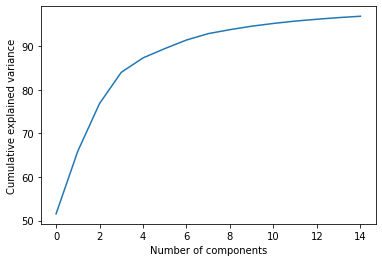

In [ ]:
plt.plot(var1)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

**The concept of the Security Market Line (SML) from CAPM. In practice, SML decomposes the returns of a stock r_i into three main factors:**
1. r_f: risk-free return
2. beta_i * (r_m-r_f): market factor return
3. e_i: idiosyncratic return
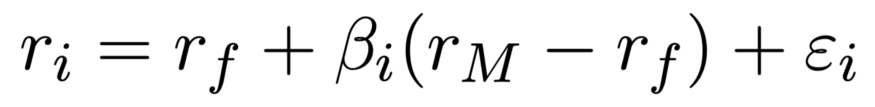

(1) the return of a stock should be at least equal to the return of the risk-free asset (otherwise why take the extra risk in the first place?)

(2) the return of the asset is also explained by the market factor, which is captured by the term (r_m-r_f) (measures the excess return of the market with respect to the risk-free asset) and beta_i (measures the degree to which the asset is affected by the market factor).

(3) the return of a stock is also affected by idiosyncratic factors, which are stock specific factors (e.g. the earnings release of a stock affects that individual stock only, but not the overall market). 

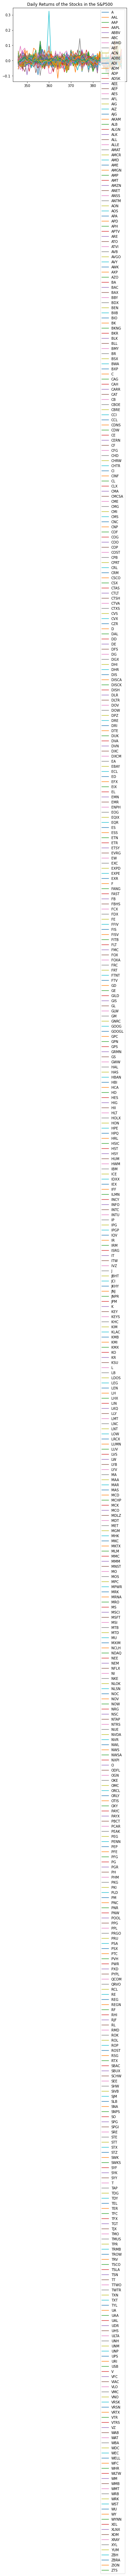

In [ ]:
rs = dff.apply(np.log).diff(1) 
rs.plot(title='Daily Returns of the Stocks in the S&P500')

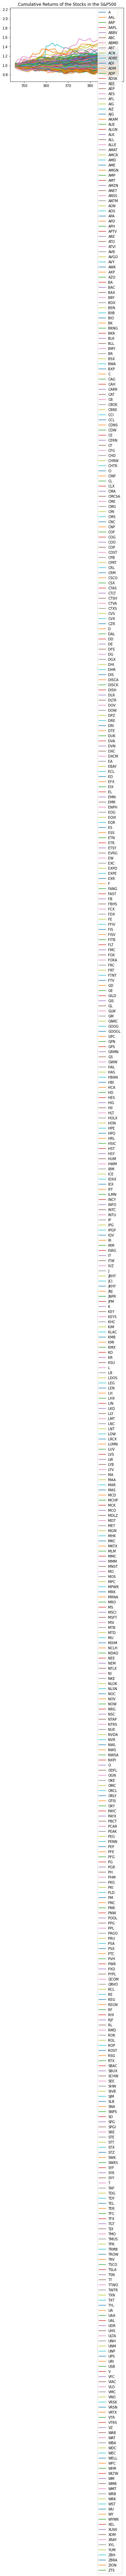

In [ ]:
crs = rs.cumsum().apply(np.exp)
crs.plot(title='Cumulative Returns of the Stocks in the S&P500')

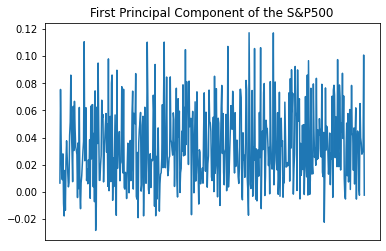

In [ ]:
pca = PCA(1).fit(rs.fillna(0))
pc1 = pd.Series(index=rs.columns, data=pca.components_[0])
pc1.plot(xticks=[], title='First Principal Component of the S&P500')

In [ ]:
weights = abs(pc1)/sum(abs(pc1)) # l1norm = 1
myrs = (weights*rs).sum(1)
rs_df = pd.concat([myrs, rs], 1)
rs_df

,0,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,ADI,ADM,ADP,ADSK,AEE,AEP,AES,AFL,AIG,AIZ,AJG,AKAM,ALB,ALGN,ALK,ALL,ALLE,AMAT,AMCR,AMD,AME,AMGN,AMP,AMT,AMZN,ANET,ANSS,ANTM,AON,...,V,VFC,VIAC,VLO,VMC,VNO,VRSK,VRSN,VRTX,VTR,VTRS,VZ,WAB,WAT,WBA,WDC,WEC,WELL,WFC,WHR,WLTW,WM,WMB,WMT,WRB,WRK,WST,WU,WY,WYNN,XEL,XLNX,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
345,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
346,0.004053,-0.007961,0.041536,0.008690,-0.009302,0.003943,0.013553,-0.002274,-0.013359,-0.004172,-0.007882,-0.010144,-0.000296,-0.000360,-0.010319,-0.003591,-0.015214,-0.007915,-0.000709,-0.006379,0.002664,-0.005446,0.002912,-0.037442,-0.016871,0.025865,-0.001725,-0.009456,-0.010145,-0.006488,0.000804,-0.002982,0.003970,-0.004617,-0.003532,0.014628,-0.001809,-0.016181,-0.000686,0.003769,...,-0.002206,0.014063,-0.012933,0.005036,0.010045,0.016837,-0.011841,-0.005720,-0.003415,-0.006795,0.009331,-0.012861,-0.001616,-0.010625,0.010726,0.061385,-0.004584,-0.001367,0.019819,-0.004876,0.004333,-0.003034,0.024806,-0.004526,-0.013509,0.020265,-0.019310,0.001206,-0.006284,-0.015434,-0.012911,0.001186,0.023098,0.016377,-0.007290,-0.005212,-0.008767,-0.009745,0.001162,-0.011794
347,-0.012108,-0.010508,0.008953,-0.022442,-0.011309,0.002734,-0.009870,0.018561,0.002054,-0.014000,-0.004401,-0.015035,-0.003574,-0.010488,-0.007415,0.006335,0.003505,-0.011187,-0.003214,-0.008960,-0.018291,0.003815,-0.006630,0.009838,0.017679,-0.019443,-0.013688,-0.012603,-0.014345,-0.008170,-0.002817,-0.013984,-0.006041,-0.017140,0.001869,-0.011721,-0.000338,-0.000156,-0.000559,-0.003887,...,-0.003849,-0.001733,0.044554,-0.025312,-0.015920,0.007345,-0.005101,-0.007953,-0.007889,-0.004617,-0.006211,-0.013204,-0.016175,-0.012606,-0.000724,-0.042912,-0.003766,0.000137,-0.021951,-0.020617,-0.008798,-0.007376,-0.007567,0.021511,-0.009617,-0.030508,0.000520,-0.001206,-0.019897,0.011241,0.000141,-0.002797,-0.028709,-0.022440,-0.020630,0.005379,0.004393,-0.009296,-0.034090,-0.000940
348,-0.010468,0.011276,-0.025361,-0.027674,-0.001282,-0.011671,0.015190,0.003693,-0.005142,-0.007234,-0.000312,0.048369,-0.008991,-0.008869,0.004463,0.003331,0.001981,0.002007,-0.002687,-0.008646,-0.010449,-0.011421,0.001772,-0.014985,0.003488,-0.013752,-0.010557,0.003420,0.024250,-0.014876,0.023762,-0.004173,-0.008929,-0.002059,-0.001259,-0.000149,-0.006500,0.016398,-0.000025,-0.007819,...,-0.004354,-0.021029,-0.011772,-0.029328,-0.027254,-0.031485,0.005853,0.000459,-0.002799,0.002034,-0.034869,-0.004557,-0.014259,0.004513,-0.008177,-0.026997,-0.005571,-0.004248,-0.014834,-0.006591,-0.006888,-0.009441,-0.011459,0.000070,0.001398,-0.021495,-0.003064,-0.002820,-0.001072,0.001268,-0.003395,0.024732,-0.024287,0.003110,-0.017169,-0.004874,-0.004695,0.014903,-0.014351,0.006854
349,0.002088,0.014789,-0.016239,0.012106,0.020794,0.010817,0.010889,0.008758,0.012128,0.010550,0.023043,0.040634,-0.004375,0.017144,0.025905,0.003438,0.003949,0.016306,-0.001975,-0.002767,-0.000828,0.008561,0.004682,0.006413,0.028310,-0.013066,0.002944,-0.000218,0.043204,-0.001667,0.023723,0.006442,0.013185,0.001901,0.019242,0.004902,0.037487,0.021903,-0.005863,0.009549,...,0.008204,0.001416,0.045076,-0.003760,-0.001190,0.012801,0.001617,0.022361,0.011889,0.004424,0.005790,-0.002286,0.004095,0.016216,0.004736,0.023439,0.006828,0.008478,-0.009576,-0.002234,0.009124,0.009157,0.011839,0.003517,-0.003307,-0.010491,0.021013,-0.012584,-0.004301,0.002609,0.014211,0.026396,-0.002376,0.004720,0.005551,0.010308,0.007034,0.018721,-0.006640,0.026047
350,0.002700,0.001135,-0.001328,-0.010258,-0.014877,-0.008489,0.000250,0.012977,-0.005704,-0.002009,-0.007349,-0.000690,0.012620,0.005855,0.001848,0.007193,0.004511,0.000394,0.006091,0.015319,0.012411,-0.011937,0.000529,0.010

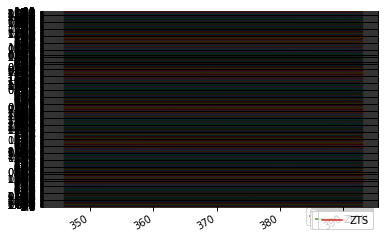

In [ ]:
crs_df = rs_df.cumsum().apply(np.exp)
crs_df.plot(subplots=True);

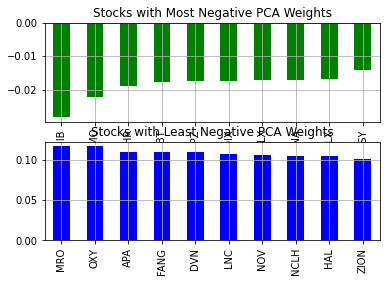

In [ ]:
fig, ax = plt.subplots(2,1)
pc1.nsmallest(10).plot.bar(ax=ax[0], color='green', grid=True, title='Stocks with Most Negative PCA Weights')
pc1.nlargest(10).plot.bar(ax=ax[1], color='blue', grid=True, title='Stocks with Least Negative PCA Weights')

#### Apply T-SNE and visualize with a graph

In [ ]:
# YOUR CODE HERE
from sklearn.manifold import TSNE
import time
time_start = time.time()
data_subset = dff.values
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(data_subset)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 48 nearest neighbors...
[t-SNE] Indexed 49 samples in 0.001s...
[t-SNE] Computed neighbors for 49 samples in 0.002s...
[t-SNE] Computed conditional probabilities for sample 49 / 49
[t-SNE] Mean sigma: 534.920935
[t-SNE] KL divergence after 250 iterations with early exaggeration: 46.357445
[t-SNE] KL divergence after 300 iterations: 0.847047
t-SNE done! Time elapsed: 0.1570441722869873 seconds


## Anomaly Detection (PART-B)

### Load and Preprocess the data

* Inspect the S&P 500 Index Data

In [ ]:
path = 'SPY.csv'
df2 = pd.read_csv(path)
#df2 = pd.read_csv(path, parse_dates=['Date'], index_col='Date')
df2.head(6)

,Date,Open,High,Low,Close,Adj Close,Volume
0,1993-02-01,43.96875,44.25000,43.96875,44.25000,25.983273,480500
1,1993-02-02,44.21875,44.37500,44.12500,44.34375,26.038315,201300
2,1993-02-03,44.40625,44.84375,44.37500,44.81250,26.313566,529400
3,1993-02-04,44.96875,45.09375,44.46875,45.00000,26.423655,531500
4,1993-02-05,44.96875,45.06250,44.71875,44.96875,26.405315,492100
5,1993-02-08,44.96875,45.12500,44.90625,44.96875,26.405315,596100


In [ ]:
df2.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
# YOUR CODE HERE
df2 = df2.drop(['Open', 'High', 'Low', 'Adj Close',	'Volume'], axis = 1)
df2

,Date,Close
0,1993-02-01,44.250000
1,1993-02-02,44.343750
2,1993-02-03,44.812500
3,1993-02-04,45.000000
4,1993-02-05,44.968750
...,...,...
7129,2021-05-24,419.170013
7130,2021-05-25,418.239990
7131,2021-05-26,419.070007
7132,2021-05-27,419.290009


In [ ]:
import plotly.graph_objs as go
#Plotting Close Price vs Date for the Dataset
def plot_date_close():
    #Lets use plotly to plot the data. Plotly allows us to make an interactive chart. 
    fig = go.Figure() #Create empty figure
    #add_trace method to add plots to the figure
    #create a line plot with 'Close' as legend, date column as x-axis and Close column as y-axis. 
    fig.add_trace(go.Scatter(x = df2.Date, y = df2.Close, mode = 'lines', name = 'Close'))
    fig.update_layout(showlegend = True)
    return fig.show()

plot_date_close() #Show plot

#### Data Preprocessing

**Using 85% of the data and train our model on it:**

In [ ]:
train_size = int(len(df2) * 0.85)
test_size = len(df2) - train_size
train, test = df2.iloc[0:train_size], df2.iloc[train_size:len(df2)]
print(train.shape, test.shape)

(6063, 2) (1071, 2)


**Next, we’ll rescale the data using the training data and apply the same transformation to the test data:**

In [ ]:
pd.options.mode.chained_assignment = None #remove warnings
from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#scaler = scaler.fit(train[['Close']])
#train['Close'] = scaler.transform(train[['Close']])
#test['Close'] = scaler.transform(test[['Close']])

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
#scaler = MinMaxScaler(feature_range=(0,1))
scaler = scaler.fit(train[['Close']])

train['Close'] = scaler.transform(train[['Close']])
test['Close'] = scaler.transform(test[['Close']])

**Finally, we’ll split the data into subsequences. Here’s the little helper function for that:**

In [ ]:
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

### Create time series data ( 1 point)

Select the variable (column) from the data and create the series of data with a window size.

Refer [LSTM Autoencoder](https://medium.com/swlh/time-series-anomaly-detection-with-lstm-autoencoders-7bac1305e713)

**We need to temporalize our data LSTM Networks require the input data to be in the shape of (n_samples x n_timesteps x n_features) n_features = 1 and n_timesteps = 30 (days)**
**This process needs to be done on X_train, y_train, X_test and y_test
defining a function that would do the process is efficient**

**Creating sequences with 30 days worth of historical data:**

In [ ]:
X_train, y_train = create_dataset(train[['Close']], train.Close, time_steps = 30)
X_test, y_test = create_dataset(test[['Close']], test.Close, time_steps = 30)

#Lets check the shapes of our data split
print(X_train.shape) #should be n_samples, n_timesteps, n_features
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(6033, 30, 1)
(6033,)
(1041, 30, 1)
(1041,)


**The shape of the data looks correct.**

### Build an LSTM Autoencoder ( 2 points)

Autoencoder should take a sequence as input and outputs a sequence of the same shape.

Hint: [LSTM Autoencoder](https://medium.com/swlh/time-series-anomaly-detection-with-lstm-autoencoders-7bac1305e713)

**To get an autoencoder to detect anomalies**
1. Train autoencoder on data without anomalies (normal data)
2. Take a datapoint and reconstruct it and calculate the reconstruction error.
3. If reconstructed point has an error above an assigned threshold. It is labeled as an Anomaly.

In [ ]:
# YOUR CODE HERE
#Setting parameters
timesteps = X_train.shape[1] #This is 30 in X_train
n_features = X_train.shape[2] #number of features is 1
print("Timesteps = ", timesteps)
print("Number of features = ", n_features)

Timesteps =  30
Number of features =  1


**Autoencoder should take a sequence as input and outputs a sequence of the same shape. Here’s how to build such a simple model in Keras:**

**The RepeatVector layer simply repeats the input n times. Adding return_sequences=True in LSTM layer makes it return the sequence.**

**Finally, the TimeDistributed layer creates a vector with a length of the number of outputs from the previous layer. Your first LSTM Autoencoder is ready for training.**

**Training the model is no different from a regular LSTM model:**

In [ ]:
LSTM_units = 50
model = keras.Sequential()
model.add(LSTM(LSTM_units, input_shape=(timesteps, n_features), return_sequences=False,name='encoder_lstm'
              ))
model.add(Dropout(0.2, name='encoder_dropout'))
model.add(RepeatVector(timesteps, name='decoder_repeater'))
model.add(LSTM(LSTM_units, return_sequences=True, name='decoder_lstm'))
model.add(Dropout(rate=0.2, name='decoder_dropout'))
model.add(TimeDistributed(Dense( n_features,name='decoder_dense_output')))

model.compile(loss='mae', optimizer='adam')

In [ ]:
#Building the LSTM Autoencoder model function
def LSTM_Autoencoder():
    
    model = Sequential()
    #Each input in data sample is a 2D array that will be fed to LSTM Network layer
    #The output of the layer will be an encoded feature vector of the input data
    
    #Input shape is 2D array timesteps x n_features. 
    #First layer will have 128 neurons
    model.add(LSTM(64, input_shape = (timesteps, n_features)))
    
    #Dropout regularization. 20% of neurons
    model.add(Dropout(0.2))
    
    #When second hidden layer is LSTM:
    #The encoded feature vector ouput must be replicated * timesteps 
    model.add(RepeatVector(timesteps))
    
    #Decoder layer
    #We set return_sequences to True. Each neuron will give a signal per timestep
    model.add(LSTM(64, return_sequences = True))
    
    #Dropout regularizaiton
    model.add(Dropout(0.2))
    
    #To use TimeDistributedlayer, return sequences from previous LSTM layer must be set to True
    #This is the output layer. It will create a vector with length of previous LSTM neurons
    model.add(TimeDistributed(Dense(n_features)))
    

    #Compiling using mean absolute error as the loss function 
    #Adam' optimizer for gradient descent with default learning rate
    model.compile(loss = 'mae', optimizer = 'adam')

    return model


#Initializing the model
model = LSTM_Autoencoder()
#Lets see the model summary
model.summary()


Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 64)                16896     
_________________________________________________________________
dropout_6 (Dropout)          (None, 64)                0         
_________________________________________________________________
repeat_vector_3 (RepeatVecto (None, 30, 64)            0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 30, 64)            33024     
_________________________________________________________________
dropout_7 (Dropout)          (None, 30, 64)            0         
_________________________________________________________________
time_distributed_7 (TimeDist (None, 30, 1)             65        
Total params: 49,985
Trainable params: 49,985
Non-trainable params: 0
__________________________________________________

### Train the Autoencoder (1 point)

* Compile and fit the model with required parameters

In [ ]:
# YOUR CODE HERE
from keras.callbacks import ModelCheckpoint, EarlyStopping
#Configure a training Early Stopper to monitor the validation loss for improvements
#The stopper will stop training when the loss did not decrease for 6 consecutive epochs
ES = EarlyStopping(monitor = 'val_loss', patience = 10, mode = 'min')

#Model Checkpoint callback. Method used to save the best model observed during training.
MC = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', save_best_only=True)

callbacks_list = [ES, MC]

#Validation split of the train data at 10%.
#Shuffle set to False since order of data is important (Time series Data)
history = model.fit(X_train, y_train, epochs = 100, batch_size = 32, 
                    validation_split = 0.1, callbacks = callbacks_list, shuffle = False)


Epoch 1/100
170/170 [==============================] - 11s 41ms/step - loss: 0.4171 - val_loss: 0.1968
Epoch 2/100
170/170 [==============================] - 6s 34ms/step - loss: 0.1365 - val_loss: 0.1067
Epoch 3/100
170/170 [==============================] - 6s 34ms/step - loss: 0.1381 - val_loss: 0.1577
Epoch 4/100
170/170 [==============================] - 6s 33ms/step - loss: 0.1205 - val_loss: 0.0996
Epoch 5/100
170/170 [==============================] - 6s 33ms/step - loss: 0.1028 - val_loss: 0.0716
Epoch 6/100
170/170 [==============================] - 6s 33ms/step - loss: 0.1189 - val_loss: 0.1205
Epoch 7/100
170/170 [==============================] - 6s 34ms/step - loss: 0.1076 - val_loss: 0.0828
Epoch 8/100
170/170 [==============================] - 6s 35ms/step - loss: 0.1116 - val_loss: 0.0645
Epoch 9/100
170/170 [==============================] - 6s 34ms/step - loss: 0.1720 - val_loss: 0.0721
Epoch 10/100
170/170 [==============================] - 6s 33ms/step - loss: 0.19

#### Plot metrics and evaluate the model (1 point)

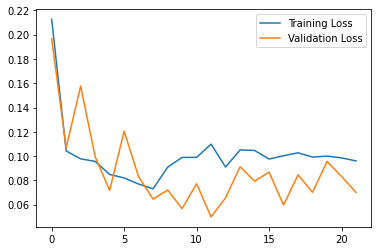

In [ ]:
# YOUR CODE HERE
def trainloss_validationloss():
    #Lets plot training and validation loss using matplotlib
    #The loss values are stored in history.history (dictionary)
    plt.plot(history.history['loss'], label = 'Training Loss') #Plotting training loss
    plt.plot(history.history['val_loss'], label = 'Validation Loss') #Plotting validation loss
    plt.legend() #Using labels as legend
    #If validation loss is lower than Training loss, it means the model is underfitting. 
    #If validation loss is higher than Training loss, it means the model is overfititng
    return plt.show()

trainloss_validationloss() #Plot

In [ ]:
#Load the best model observed as saved_model
saved_model = tf.keras.models.load_model('best_model.h5')

33/33 [==============================] - 1s 12ms/step - loss: 0.4897


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



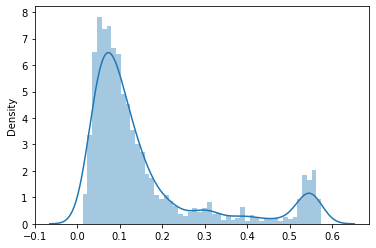

In [ ]:
X_train_pred = saved_model.predict(X_train) #Model prediction on training data

#Save Mean Absolute Error to a pandas DataFrame in the Column 'Error'
train_mae_loss = pd.DataFrame(np.mean(np.abs(X_train_pred - X_train), axis = 1), columns = ['Error'])

#Evaluate the best model, saved_model on test data for total loss. 
saved_model.evaluate(X_test, y_test)

#Lets plot the distribution plot for MAE Loss Error using seaborn
sns.distplot(train_mae_loss, bins = 50, kde = True)

**We’ll pick a threshold of 0.65, as not much of the loss is larger than that. When the error is larger than that, we’ll declare that example an anomaly:**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



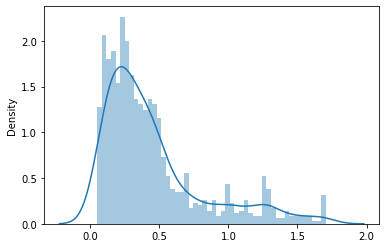

In [ ]:
#Lets set a threshold for the MAE Loss. If error is larger, it will be predicted as an anomaly
threshold = 0.65 #This is the value that decides a data point is an anomaly or not. 

#Predict X_test
X_test_pred = saved_model.predict(X_test)

#Store MAE Loss for test data
test_mae_loss = np.mean(np.abs(X_test_pred - X_test), axis = 1)

sns.distplot(test_mae_loss, bins=50, kde=True)

### Detect Anomalies in the S&P 500 Index Data (2 points)

* Predict the data and calculate the loss
* Define threshold and detect the anomalies

Discuss the Impact of COVID19 pandemic on stock prices in terms of anomalies detected during the pandemic period in stock prices

In [ ]:
# YOUR CODE HERE
#Create DataFrame of losses
test_score_df = pd.DataFrame(test[timesteps:]) #We use the data that comes after time_steps in test data
test_score_df['loss'] = test_mae_loss #Create test_mae_loss column
test_score_df['threshold'] = threshold #Create threshold column
test_score_df['anomaly'] = test_score_df.loss > test_score_df.threshold #Set anomaly as True if
test_score_df['Close'] = test[timesteps:].Close

In [ ]:
test_score_df.head(10)

,Date,Close,loss,threshold,anomaly
6093,2017-04-11,2.538640,0.100292,0.65,False
6094,2017-04-12,2.515700,0.103468,0.65,False
6095,2017-04-13,2.481846,0.109885,0.65,False
6096,2017-04-17,2.527727,0.127115,0.65,False
6097,2017-04-18,2.512136,0.116369,0.65,False
6098,2017-04-19,2.502559,0.113822,0.65,False
6099,2017-04-20,2.544876,0.114808,0.65,False
6100,2017-04-21,2.528172,0.096867,0.65,False
6101,2017-04-24,2.585634,0.092726,0.65,False
6102,2017-04-25,2.616370,0.070520,0.65,False


In [ ]:
test_score_df.tail(10)

,Date,Close,loss,threshold,anomaly
7124,2021-05-17,6.557893,1.683777,0.65,True
7125,2021-05-18,6.478158,1.682163,0.65,True
7126,2021-05-19,6.454104,1.693784,0.65,True
7127,2021-05-20,6.552548,1.705656,0.65,True
7128,2021-05-21,6.544975,1.701643,0.65,True
7129,2021-05-24,6.639187,1.698897,0.65,True
7130,2021-05-25,6.618473,1.688866,0.65,True
7131,2021-05-26,6.636960,1.686041,0.65,True
7132,2021-05-27,6.641860,1.685947,0.65,True
7133,2021-05-28,6.658564,1.684512,0.65,True


In [ ]:
def testloss_threshold():
    #Lets create an interactive chart with plotly to show data with anomalies
    fig = go.Figure() #Empty figure
    #Create lineplot with x-axis as values after timesteps and y-axis as loss values.
    fig.add_trace(go.Scatter(x = test[timesteps:].Date, y = test_score_df.loss,
                            mode = 'lines', name = 'Test Loss')) 
    
    #Create lineplot with x-axis as values after timesteps and y-axis as threshold.
    fig.add_trace(go.Scatter(x = test[timesteps:].Date, y = test_score_df.threshold,
                            mode = 'lines', name = 'Threshold')) 
    
    fig.update_layout(showlegend = True) #Add legend to plot
    
    return fig.show()

testloss_threshold() #Plot

**Creating a DataFrame only from True values in the anomaly column**

In [ ]:
anomalies = test_score_df[test_score_df.anomaly == True]
anomalies

,Date,Close,loss,threshold,anomaly
6523,2018-12-26,2.786307,0.699933,0.65,True
6800,2020-02-03,4.522208,0.650655,0.65,True
6801,2020-02-04,4.632233,0.659755,0.65,True
6815,2020-02-25,4.266745,0.712013,0.65,True
6816,2020-02-26,4.241132,0.822724,0.65,True
...,...,...,...,...,...
7129,2021-05-24,6.639187,1.698897,0.65,True
7130,2021-05-25,6.618473,1.688866,0.65,True
7131,2021-05-26,6.636960,1.686041,0.65,True
7132,2021-05-27,6.641860,1.685947,0.65,True


In [ ]:
def show_anomalies():
    #Lets create an interactive chart with plotly to show anomalies
    fig = go.Figure() #Empty figure
    #We need to Inverse transform the test prices using Scalar method and built in inverse transformer
    #Create lineplot with x-axis as test values after timesteps and y-axis as closing price.
    fig.add_trace(go.Scatter(x = test[timesteps:].Date, y = scaler.inverse_transform(test[timesteps:].Close),
                            mode = 'lines', name = 'Close Price')) 
    
    #Create lineplot with x-axis as anomaly dates. y-axis as anomaly price.
    #We use mode = markers to plot a scatter plot
    fig.add_trace(go.Scatter(x = anomalies.Date, y = scaler.inverse_transform(anomalies.Close),
                            mode = 'markers', name = 'Anomaly')) 
    
    fig.update_layout(showlegend = True) #Add legend to plot
    
    return fig.show()

show_anomalies() #Show Anomalies